<a href="https://colab.research.google.com/github/niemand-01/ML-Demo/blob/master/KMeans_Color_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from google.colab.patches import cv2_imshow

In [19]:
x,y = make_blobs(n_samples=100, n_features=2,centers=4)
print(len(x))

100


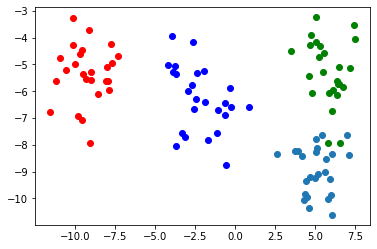

In [21]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1],c='r')
plt.scatter(x[y==2,0],x[y==2,1],c='b')
plt.scatter(x[y==3,0],x[y==3,1],c='g')

In [23]:
km = KMeans(n_clusters=3)
km.fit(x)
y_km = km.predict(x)

In [25]:
print(km.labels_)

[0 1 1 1 0 1 0 1 0 0 2 2 0 0 1 0 1 1 2 2 1 0 1 1 2 2 2 1 0 0 0 1 1 2 1 2 2
 1 1 1 0 2 1 0 1 1 2 1 1 1 1 1 1 2 1 0 2 2 0 1 1 1 1 0 1 1 2 1 1 0 2 1 1 2
 2 0 0 1 2 1 1 2 0 2 1 0 0 1 1 1 0 0 1 1 1 2 1 1 2 2]


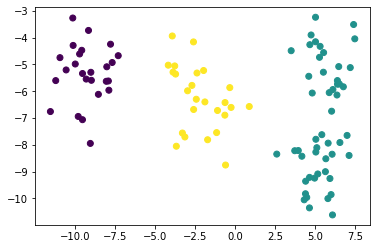

In [28]:
plt.scatter(x[:,0],x[:,1],c=km.labels_,cmap='viridis')

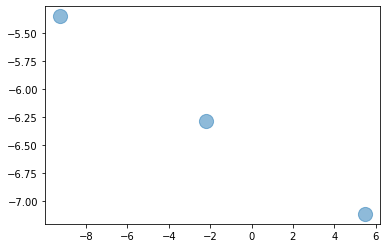

In [30]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,alpha=0.5)

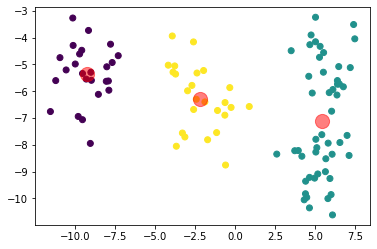

In [33]:
plt.scatter(x[:,0],x[:,1],c=km.labels_,cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,alpha=0.5,c='r')

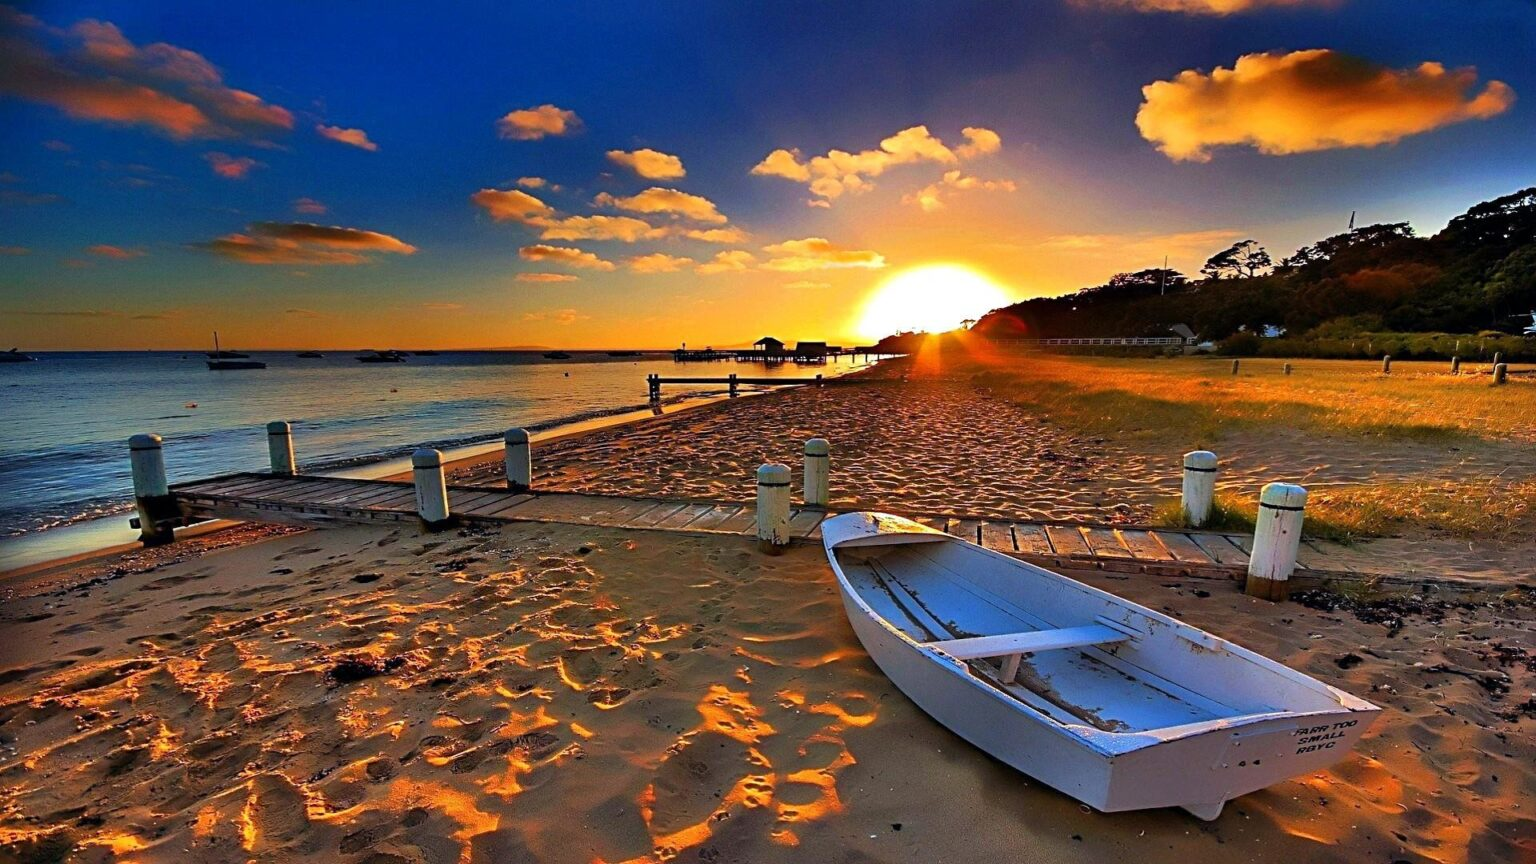

In [37]:
img = cv2.imread('drive/My Drive/ml-demo/pics/beach.jpg',1)
cv2_imshow(img)

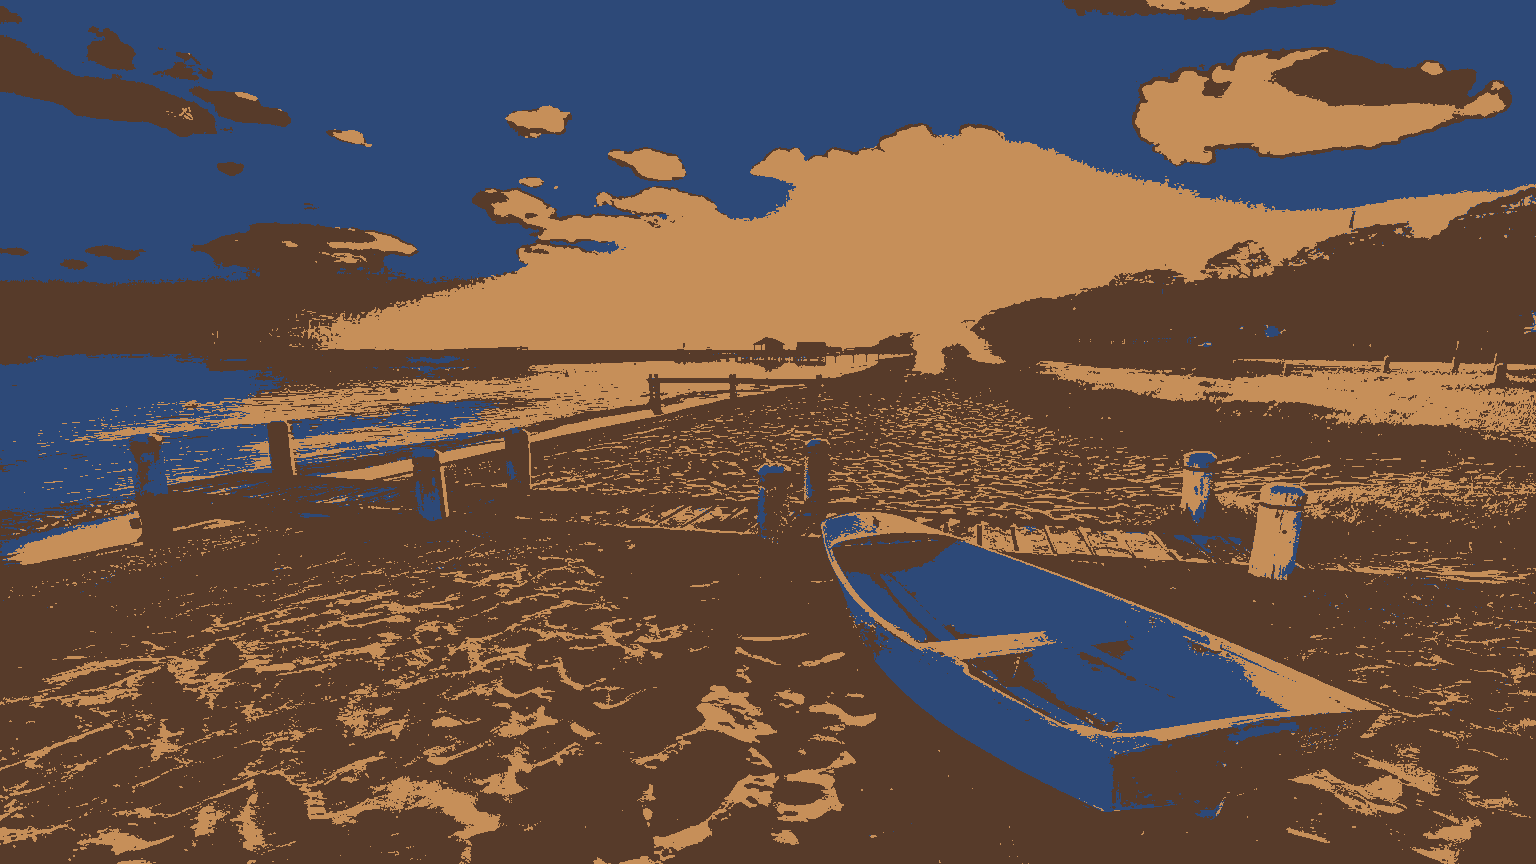

In [39]:
def color_quantization(img,k):
  # Defining input data for clustering
  data = np.float32(img).reshape((-1,3))
  # defineing crietria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
  # applying cv2.kmeans
  ret,label,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

color_3 = color_quantization(img,3)
cv2_imshow(color_3)